In [55]:
%matplotlib inline
from mdt import *
#import seaborn

# Load Input

In [56]:
mp.P_T1 = r"^(.*):$"
mp.C_TITLE = ":"
cfg = yaml.load(open("mdt_config.yaml","r").read())
auth_token = cfg['auth_token']
mu.import_from_dropbox(auth_token, "tmp")
dt = mp.parse_md_files("./tmp/"+"*.taskpaper")
del dt["T2"];del dt["T3"];del dt["ID"]

# Task Stats

In [57]:
# Filter tasks only
df = dt[dt.TXT.str.contains("^\s*- ")]
dfs = ms.add_stat(df, "done,p")
dfs.rename(columns={"Filename": "Week", "T1": "Project", "done": "Date", "p":"Time"}, inplace=True)

## Daily Stats

In [58]:
daily = dfs.groupby(['Week',"Date"]).agg({'Time': ['sum'], 'TXT':'count', 'Project':'nunique'})
daily.columns = daily.columns.map(mu.flattenCols)
daily.rename(columns={"TXT_count": "Task_done"}, inplace=True)
daily['Ratio_Time'] = daily.Time_sum / 8
daily['Ratio_Task'] = daily.Task_done / 4
daily['Ratio_Project'] = daily.Project_nunique / 3
dstat = daily.fillna(0).sort_index(0, ascending=False).round(2)
dstat.to_csv("rpt/daily_stats.tsv",sep="\t")
dstat[:10]

Time_sum  Task_done  Project_nunique  Ratio_Time  \
Week     Date                                                           
20170205 2017-02-09       5.0          2                2        0.62   
         2017-02-08       9.0          6                5        1.12   
         2017-02-07       5.0          5                4        0.62   
         2017-02-06       8.0          5                3        1.00   
20170129 2017-02-04       4.0          2                2        0.50   
         2017-02-03       0.0          1                1        0.00   
         2017-01-31       8.0          2                2        1.00   
         2017-01-30       0.0          1                1        0.00   
20170122 2017-01-27       4.0          1                1        0.50   
         2017-01-26       3.0          4                2        0.38   

                     Ratio_Task  Ratio_Project  
Week     Date                                   
20170205 2017-02-09        0.50           0.67  
         2017-02-08        1.50           1.67  
         2017-02-07        1.25           1.33  
         2017-02-06        1.25           1.00  
20170129 2017-02-04        0.50           0.67  
         2017-02-03        0.25           0.33  
         2017-01-31        0.50           0.67  
         2017-01-30        0.25           0.33  
20170122 2017-01-27        0.25           0.33  
         2017-01-26        1.00           0.67

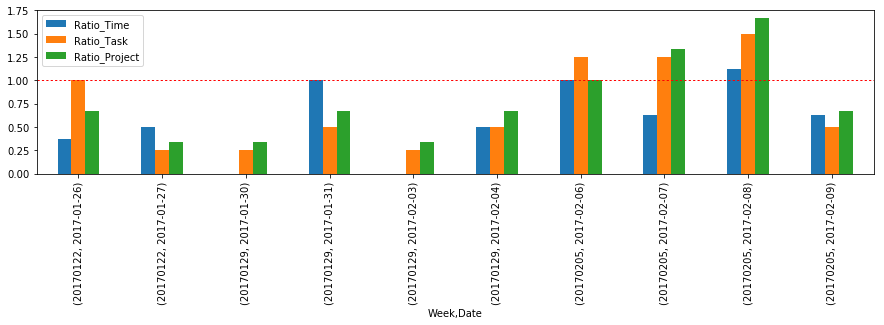

In [59]:
plt = daily.ix[-10:,3:].plot(kind="bar", figsize=[15,3])
plt.axhline(y=1, linewidth=1, color = 'red', linestyle = 'dotted');

## Weekly Stats

In [60]:
weekly = dfs.groupby(["Week"]).agg({'Time': ['sum'], 'TXT': 'count', 'Date': 'count'})
weekly.columns = weekly.columns.map(mu.flattenCols)
weekly.rename(columns={"TXT_count": "Task_total", "Date_count": "Task_done"}, inplace=True)
weekly.fillna(0).sort_index(0, ascending=False)
weekly['Ratio_Time'] = weekly.Time_sum / 40
weekly['Ratio_Task'] = weekly.Task_done / weekly.Task_total
wstat = weekly.fillna(0).sort_index(0, ascending=False).round(2)
wstat.to_csv("rpt/weekly_stats.tsv",sep="\t")
wstat

,Time_sum,Task_total,Task_done,Ratio_Time,Ratio_Task
Week,,,,,
20170212,0.0,1,0,0.00,0.00
20170205,27.0,26,18,0.68,0.69
20170129,12.0,19,6,0.30,0.32
20170122,19.0,26,13,0.48,0.50
20170115,17.0,23,11,0.42,0.48
20170108,17.0,33,20,0.42,0.61
20170101,18.0,24,14,0.45,0.58


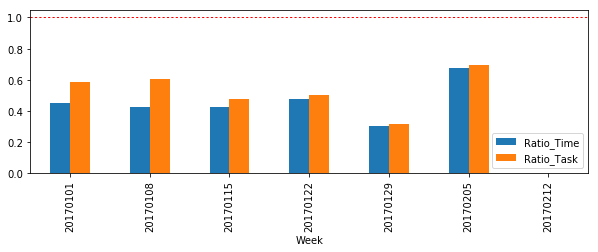

In [61]:
plt = weekly.ix[:,3:].plot(kind="bar", figsize=[10,3])
plt.axhline(y=1, linewidth=1, color = 'red', linestyle = 'dotted');

# Journal Stats

In [62]:
# Filter journals only
dj = dt[dt.T1.str.contains("^20")]
djs = ms.add_stat(dj, "h")
djs.rename(columns={"Filename": "Week", "T1": "Date", "h":"Happiness"}, inplace=True)

## Writing Amount

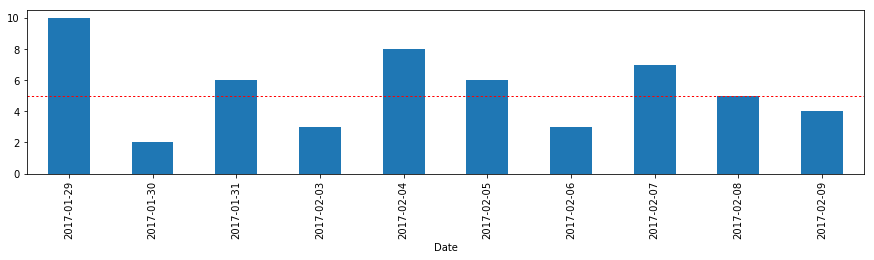

In [64]:
djsa = djs.groupby(["Date"]).agg({'TXT': ['count']})
plt = djsa[-10:].plot(kind="bar", figsize=[15,3])
plt.legend_.remove()
plt.axhline(y=5, linewidth=1, color = 'red', linestyle = 'dotted');

## Happiness

In [65]:
djs[~djs.Happiness.isnull()]

,Week,Date,TXT,Happiness
28,20170205,2017-02-09,Lunch too fast & too much @h(2),2.0
32,20170205,2017-02-08,How to be happy working from home @h(3),3.0
36,20170205,2017-02-08,Had a productive evening @h(4),4.0
38,20170205,2017-02-07,Had to be more careful on locking the apt @h(2),2.0
40,20170205,2017-02-07,2/17 I-140 approval / Snap H1 filing @h(3),3.0
46,20170205,2017-02-06,One achievement changes the whole perspective:...,4.0
47,20170205,2017-02-05,Costco return fiasco @h(1),1.0
52,20170205,2017-02-05,Still need to control reading! @h(2),2.0


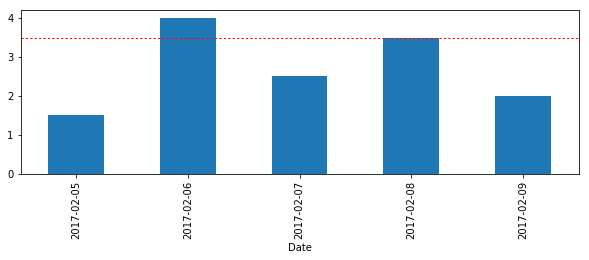

In [66]:
djsa = djs[~djs.Happiness.isnull()].groupby(["Date"]).agg({'Happiness': ['mean']})
plt = djsa.plot(kind="bar", figsize=[10,3])
plt.legend_.remove()
plt.axhline(y=3.5, linewidth=1, color = 'red', linestyle = 'dotted');